#### `Inequality constrained` optimization

For twice-differentiable convex functions $f_i$, we want to

$$\min f_0(x), \text{s.t. } f_i(x)\leq 0, i=1, \cdots, m, \,Ax=b$$

where $A\in \mathbf{R}^{p \times n}, \, \text{rank }A=p$, and $p^*$ is optimal value

Assume the problem is `strictly feasible`, therefore strong duality holds (Slater's condition)

Examples include LP, QP, QCQP, etc.

#### Objective of interior point method

The idea of interior point methods is to `convert` solving an inequality constrained problem into solving a `sequence of small number` of unconstrained or equality constrained problems (which we know how to solve, e.g., Newton's method)

The sequence of problems is `parameterized` by some parameter, say $t$

#### Log-barrier function

Define log-barrier function $\phi(x)$ as

$$\phi(x)=-\sum_{i=1}^m \log (-f_i(x)), \text{dom }\phi=\{x|f_1(x)<0,\cdots,f_m(x)<0\} $$

The inequality constraints can be put into the objective

$$\min f_0(x)+\frac{1}{t}\phi(x), \text{s.t. } Ax=b$$

where $t>0$

This is because as $f_i(x)$ approches 0 (from negative), the penalty increases drastically, making sure $x$ actually never reaches the boundary

The approximation improves as $t\rightarrow \infty$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

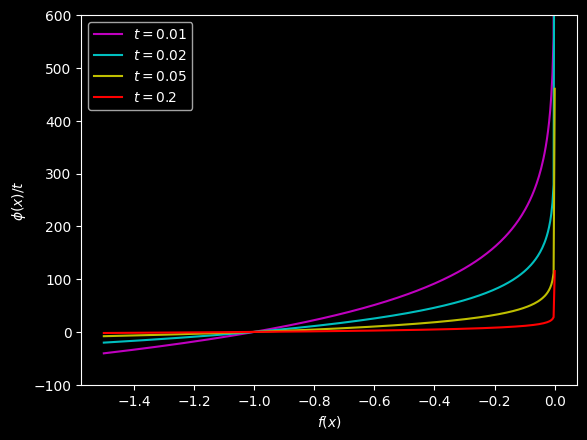

In [2]:
def log_barrier(fx, t):
    return -np.log(-fx)/t

x = np.linspace(-1.5, -1e-10, 400)

plt.plot(x, log_barrier(x, 0.01), label="$t=0.01$", linestyle='-', color='m')
plt.plot(x, log_barrier(x, 0.02), label="$t=0.02$", linestyle='-', color='c')
plt.plot(x, log_barrier(x, 0.05), label="$t=0.05$", linestyle='-', color='y')
plt.plot(x, log_barrier(x, 0.2), label="$t=0.2$", linestyle='-', color='r')

plt.xlabel("$f(x)$")
plt.ylabel("$\phi(x)/t$")
plt.ylim(-100, 600)
plt.legend()
plt.show()

This is now an equality constrained problem and the objective function is twice differentiable with

$$\begin{align*}
\nabla \phi(x)&=\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla f_i(x) \\
\nabla^2 \phi(x)&=\sum_{i=1}^m\frac{1}{f_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T+\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla^2 f_i(x)
\end{align*}$$


#### Centering problem and central path

For $t>0$, let $x^*(t)$ as the solution of the `centering problem`

$$\boxed{\min tf_0(x)+\phi(x), \text{s.t. } Ax=b}$$

the `central path` is defined as the trajectory that traces the solution as $t$ changes

$$\{x^*(t)|t>0\}$$

(when $t=0$, the objective is to minimize the log-barrier function, which would keep $x$ as far away from each boundary as possible and the solution $x^*(0)$ is the analytic center)

#### Optimality condition and Lagrangian

For point on `central path` $x^*(t), t>0$, we can write the corresponding optimality condition of the `centering problem` (plug in the gradient of $\phi(x)$)

$$\begin{align*}Ax&=b, \,\, t\nabla f_0(x)+\nabla \phi(x)+A^Tw=0 \\ \Longrightarrow Ax&=b, \,\, \nabla f_0(x)+\sum_{i=1}^m\frac{1}{-tf_i(x)}\nabla f_i(x)+\frac{1}{t}A^Tw=0
\end{align*}$$

We also write out the Lagrangian of the `original inequality constrained problem`

$$L(x, \lambda, \nu)=f_0(x)+\sum_{i=1}^m\lambda_i f_i(x)+\nu^T(Ax-b)$$

Take gradient w.r.t. $x$ and set to zero

$$\nabla f_0(x)+\sum_{i=1}^m\lambda_i \nabla f_i(x)+A^T\nu=0$$

We see that point on the central path $x^*(t)$ `minimizes the Lagrangian` for $\lambda, \nu$ given by

$$\lambda^*_i(t)=\frac{1}{-tf_i(x^*(t))}>0, i=1, \cdots, m, \, \nu^*(t)=\frac{w}{t}$$

#### Duality gap on central path

Therefore, by minimizing the centering problem to get $x^*(t)$ (e.g., through Newton's method), we also inadvertently have a point $\lambda^*, \nu^*$ that is `dual feasible`, which immediately gives a `lower bound` of optimal value to original problem $p^*$

More specifically, through Lagrange dual function $g(\lambda, \nu)$, we have

$$\begin{align*}
f_0(x^*(t))\geq p^*\geq g(\lambda^*(t), \nu^*(t))&=\inf_{x\in D} L(x, \lambda^*(t), \nu^*(t))\\
&=L(x^*(t),\lambda^*(t), \nu^*(t))\\
& \text{plug these into Lagrangian expression}\\
&=f_0(x^*(t))+\sum_{i=1}^m\lambda_i^*(t) f_i(x^*(t))+(\nu^{*}(t))^T(Ax^*(t)-b) \\
& x^*(t)\text{ satisfies equality constraints in centering problem, so } Ax^*(t)=b\\
&=f_0(x^*(t))+\sum_{i=1}^m\lambda_i^*(t) f_i(x^*(t))\\
& \text{plug in } \lambda^*_i(t)=\frac{1}{-tf_i(x^*(t))}\\
&=f_0(x^*(t))-\frac{m}{t}
\end{align*}$$

$f_0(x^*(t))\geq p^*$ holds because $p^*$ is optimal value of the original inequality constrained problem with objective function $f_0(x)$ and $x^*(t)$ is feasible for this problem

This indicates that with $x^*(t)$, $f_0(x^*(t))$ would be `no more than` $\frac{m}{t}$ suboptimal for the original problem

#### KKT conditions

From above, we see that on central path, $x^*, \lambda^*, \nu^*$ almost satisfy the KKT conditions

* primal feasibility $f_i(x^*)\leq 0, i=1, \cdots, m,\, Ax^*=b$
* dual feasibility $\lambda^*\geq 0$
* `approximate` complementary slackness $-\lambda_i^*f_i(x^*)=1/t$
* vanishing gradient
$$\nabla f_0(x^*)+\sum_{i=1}^m\frac{1}{-tf_i(x^*)}\nabla f_i(x^*)+\frac{1}{t}A^T\nu^*=0$$


#### Barrier method

Given strictly feasible $x, t=t^0>0, \mu>1$ ($\mu$ typically in 10-20), four steps in `outer loop`

* compute $x^*(t)$ by solving centering problem (`inner loop` e.g., using Newton's method starting at current $x$)
* $x \leftarrow x^*(t)$
* if $m/t< \epsilon$, quit
* $t \leftarrow \mu t$

$\mu$ determines `trade-off` between number of outer and inner iterations

#### LP example with inequality constraints

$$\min c^Tx, \,\, \text{s.t. } Ax\leq b, A\in \mathbf{R}^{m\times n}$$

In [3]:
np.random.seed(42)

m, n = 200, 100
A = np.random.randn(m, n)
x = np.random.rand(n)
b0 = A @ x
b = b0 + 0.01
c = A.T @ np.random.rand(m)
x0 = x

In [4]:
# Solve using CVXPY
x_var = cp.Variable(n)
constraints = [A @ x_var <= b]
objective = cp.Minimize(c @ x_var)

problem = cp.Problem(objective, constraints)
result = problem.solve(solver=cp.SCS, eps=1e-6)

print("Optimal objective value (CVXPY):", result)
# print("Optimal x (CVXPY):", x_var.value)
print("Feasibility (CVXPY):", np.all(A @ x_var.value <= b))

Optimal objective value (CVXPY): -21.47205347629854
Feasibility (CVXPY): False


With log-barrier function, the original problem becomes `unconstrained` and we can use Newton's method

$$\min tc^Tx-\sum \log(b-Ax)$$

The gradient is

$$\nabla f(x)=tc+A^T\left(\frac{1}{b-Ax}\right)$$

The Hessian is

$$\nabla^2 f(x)=A^T\text{diag}\left(\frac{1}{(b-Ax)^2}\right)A$$

In [5]:
def cholesky_factorization(A):
    m = A.shape[0]
    l_mat = A.copy().astype(float)

    for k in range(m):
        if l_mat[k, k] <= 0:
            raise ValueError('Matrix is not positive definite')

        # Follow the first step, iteratively apply to a smaller and smaller K
        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= np.sqrt(l_mat[k, k])

    return np.tril(l_mat)

def forward_substitution(L, b):
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def back_substitution(R, b):
    m, n = R.shape
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

In [6]:
def int_pt_lp(A, b, c, x0, mu, tol, np_solver=False):
    total_iter = 500
    alpha = 0.01
    beta = 0.5
    tol = 1e-5

    m, n = A.shape
    t = 1
    x = x0
    gaps = []
    inner_iter = []

    for k in range(total_iter):
        d = b - A @ x
        f = t * c @ x - np.sum(np.log(d))
        grad = t * c + A.T @ (1 / d)
        hess = A.T @ np.diag(1 / (d ** 2)) @ A

        # dx = - hess^{-1} nabla f(x)
        if np_solver:
            dx = - np.linalg.solve(hess, grad)
        else:
            try:
                L = cholesky_factorization(hess)
                dx = forward_substitution(L, -grad)
                dx = back_substitution(L.T, dx)
            except Exception as e:
                print(e)
        nt_decre_sq = - grad @ dx

        s = 1

        # Ensure feasibility
        while np.min(b - A @ (x + s * dx)) < 0:
            s *= beta

        # Line search
        while t * c @ (x + s * dx) - np.sum(np.log(b - A @ (x + s * dx))) > f - alpha * s * nt_decre_sq:
            s *= beta

        x += s * dx

        # Check whether x_star(t) is obtained for current centering problem
        if - nt_decre_sq / 2 < tol:
            inner_iter.append(k)

            # Check whether duality gap is within tolerance
            gap = m / t
            gaps.append(gap)
            if gap < tol:
                return x, inner_iter, gaps

            # Increase t
            t = t * mu

    # If not converged to within tolerance
    inner_iter.append(total_iter)
    gaps.append(gap)
    print(f"Max # of iterations ({total_iter}) reached")
    return x, inner_iter, gaps

Converged c^Tx (with mu=2) -21.472021488973013
Primal feasiblity True
Converged c^Tx (with mu=10) -21.472062799269917
Primal feasiblity True
Converged c^Tx (with mu=50) -21.472060303573304
Primal feasiblity True
Converged c^Tx (with mu=150) -21.47206789594003
Primal feasiblity True


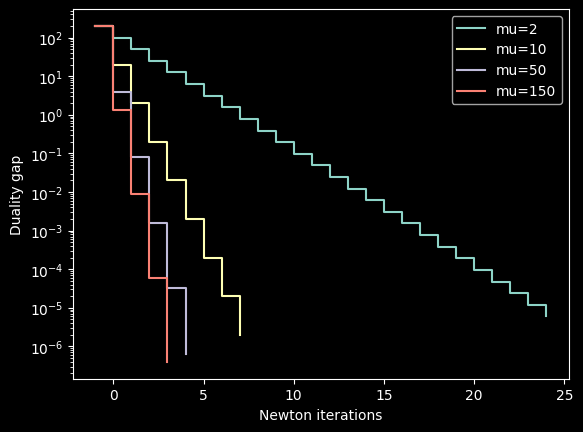

In [7]:
muvals = [2, 10, 50, 150]
data = []
for mu in muvals:
    x, iters, gaps = int_pt_lp(A, b, c, x0, mu, 1e-6)
    print(f"Converged c^Tx (with mu={mu})", c @ x)
    print("Primal feasiblity", np.all(A @ x < b))
    l = len(gaps)
    iters_ext, gaps_ext = [], []
    for i in range(l - 1):
        iters_ext.extend([iters[i] - 1, iters[i + 1] - 1])
        gaps_ext.extend([gaps[i], gaps[i]])
    iters_ext.append(iters[-1] - 1)
    gaps_ext.append(gaps[-1])
    data.append((iters_ext, gaps_ext))

plt.figure(1)
for i, mu in enumerate(muvals):
    plt.semilogy(data[i][0], data[i][1], label=f"mu={mu}")
plt.xlabel("Newton iterations")
plt.ylabel("Duality gap")
plt.legend()
plt.show()

#### Feasibility problem

We need to compute a `strictly feasible starting point` for barrier method

Find $x$, such that $f_i(x)< 0, i=1, \cdots, m, \, Ax=b$

##### Basic method

$$\min_{x, s} s\,\,\, \text{s.t. } f_i(x)\leq s, i=1, \cdots, m,\,\, Ax=b$$

* if $x, s$ feasible, with $s<0$, $x$ is strictly feasible for feasibility problem, and we can start barrier iterations
* if optimal $s$ is positive, then no $x$ is feasible
* if zero and attained, then $x$ is feasible (but not strictly)
* if zero, not attained, then no $x$ is feasible

##### Sum of infeasibilities

$$\min_{x, s} 1^Ts\,\,\, \text{s.t. } f_i(x)\leq s_i, s_i\geq 0, i=1, \cdots, m,\,\, Ax=b$$